<a href="https://colab.research.google.com/github/mudogruer/keras_nn/blob/main/Spaceship_Titanic_Mudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q scikit-learn
!pip install -U -q catboost

# introduction



 1.  Load and Check Data
 1.  Variable Description
 1.  Univariate Variable Analysis
        * Catagorical Variable
        * Numerical Variable
 1.  Basic Data Analysis
 1.  Outlier Detection
 1.  Missing Values
        * Find Missing Value
        * Fill Missing value
 1.  Visualization
 1.  Fill Missing Age Values



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Load Data

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_passengerId = test_df["PassengerId"]

In [4]:
sample_df = pd.read_csv("sample_submission.csv")
sample_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# 2. Variable Describtion


* 'PassengerId' : uniqe ID val. for passengers
* 'HomePlanet' : which planet the passengers from {'Europa','Earth', 'Mars'}
* 'CryoSleep' : are the passengers in deep sleep (yes/no)
* 'Cabin' : cabin number of passengers
* 'Destination' : where the passengers intended to go
* 'Age' : age of the passengers
* 'VIP' : status of passengers (yes/no)
* 'RoomService'
* 'FoodCourt'
* 'ShoppingMall'
* 'Spa'
* 'VRDeck'
* 'Name'
* 'Transported'

In [9]:
Counter(train_df["VIP"])

Counter({False: 8291, True: 199, nan: 203})

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Univariate Variable Analysis

 *  Catagorical Variable Analysis: HomePlanet ,	CryoSleep ,	Cabin ,	Destination  ,	VIP , Transported
 *  Numerical Variable Analysis: Age 	, RoomService ,	FoodCourt ,	ShoppingMall ,	Spa  ,	VRDeck


# Catagorical Variable

In [11]:
def bar_Plot(variable):
    """
    input variable
    output bar plot & value count

    """
    #get feature
    var = train_df[variable]
    #number of catagorical variables
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize= (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable, varValue))

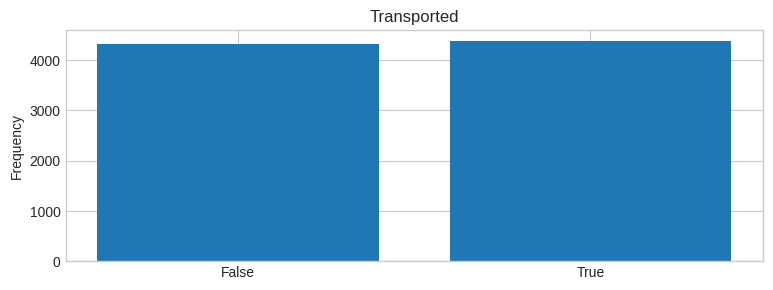

Transported 
 Transported
True     4378
False    4315
Name: count, dtype: int64


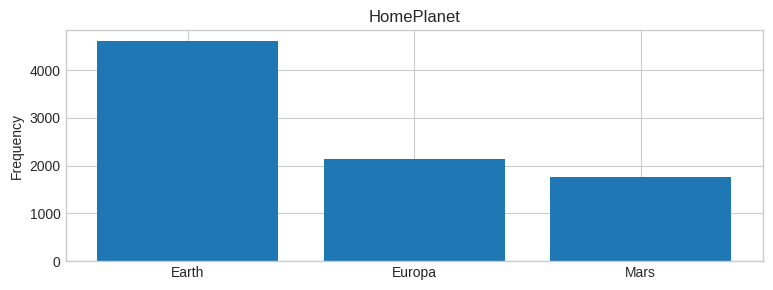

HomePlanet 
 HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


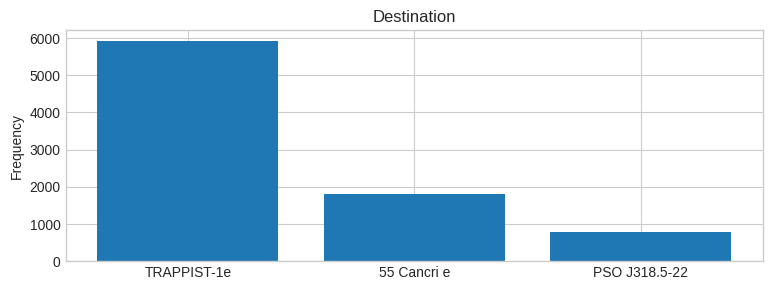

Destination 
 Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


In [12]:
catagory1 = [ 'Transported','HomePlanet','Destination']


for c in catagory1:
    bar_Plot(c)


In [13]:
catagory2 = ['CryoSleep' , 'Cabin' , 'VIP']
for c in catagory2:
    print("{}".format(train_df[c].value_counts()))

CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Cabin
G/734/S     8
B/11/S      7
F/1411/P    7
B/82/S      7
G/981/S     7
           ..
G/543/S     1
B/106/P     1
G/542/S     1
F/700/P     1
G/559/P     1
Name: count, Length: 6560, dtype: int64
VIP
False    8291
True      199
Name: count, dtype: int64


# Numerical Analysis

In [14]:
def hist_plot(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} frequency of histogram".format(variable))
    plt.show()

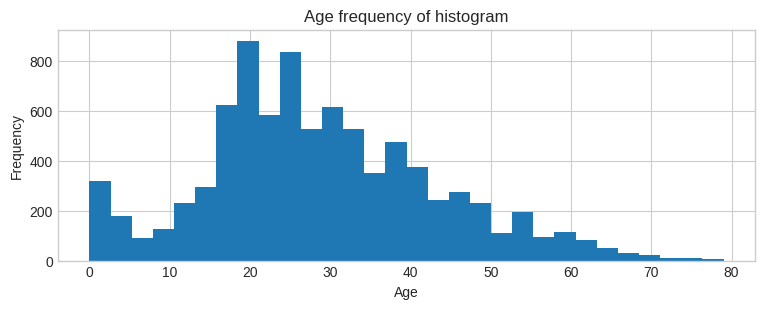

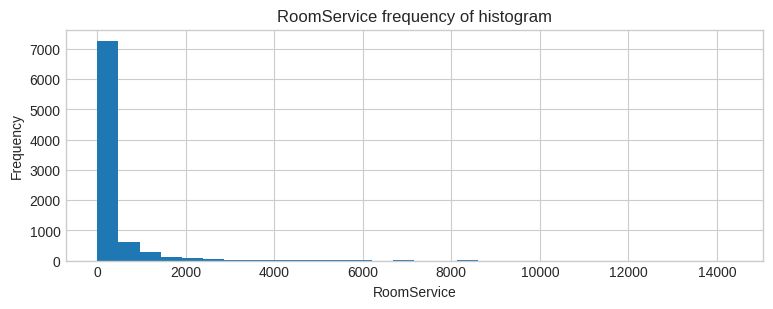

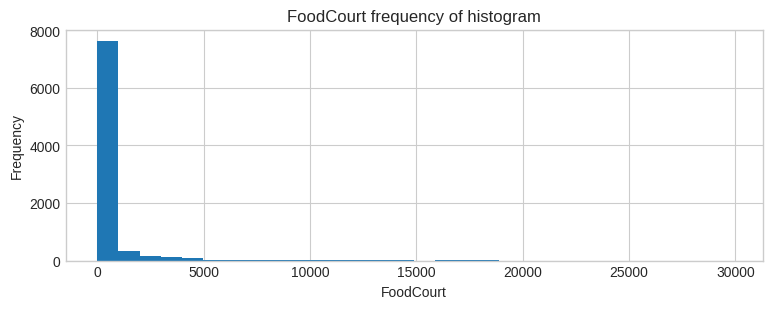

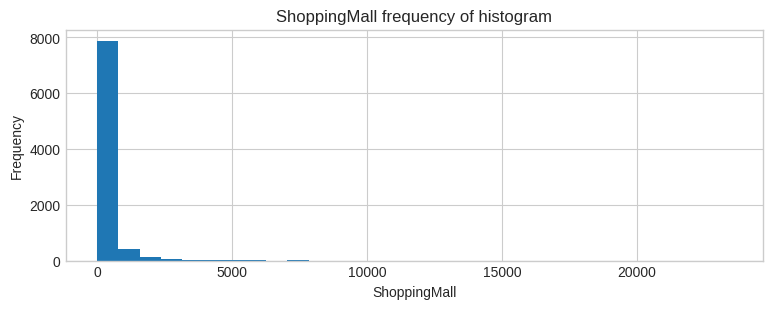

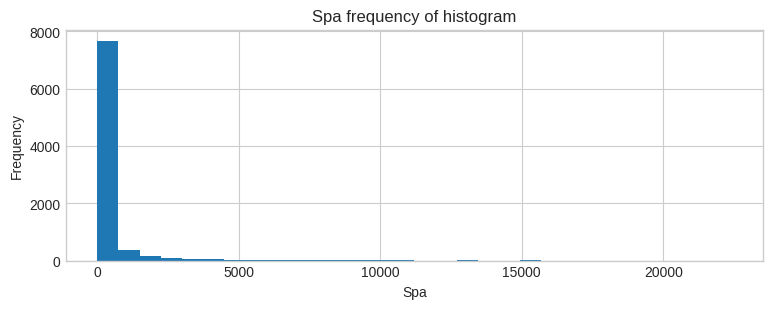

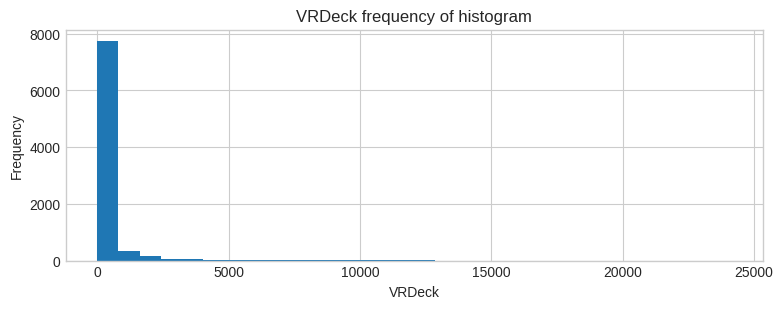

In [15]:
numericVar = ["Age", 	"RoomService", 	"FoodCourt", 	"ShoppingMall", 	"Spa", 	"VRDeck"]

for n in numericVar:
    hist_plot(n)

# Basic Data Analysis

* 'HomePlanet' -- 'Transported'
* 'Destination' -- 'Transported'
* 'CryoSleep' -- 'Transported'
* 'Cabin' -- 'Transported'
* 'VIP' -- 'Transported'

In [16]:
# HomePlanet' -- 'Transported'
train_df[['HomePlanet', 'Transported']].groupby(["HomePlanet"], as_index = False).mean().sort_values(by="Transported", ascending = False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [17]:
# 'Destination' -- 'Transported'
train_df[['Destination', 'Transported']].groupby(["Destination"], as_index = False).mean().sort_values(by="Transported", ascending = False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [18]:
#'CryoSleep' -- 'Transported'
train_df[['CryoSleep', 'Transported']].groupby(["CryoSleep"], as_index = False).mean().sort_values(by="Transported", ascending = False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [19]:
# 'Cabin' -- 'Transported'
train_df[['Cabin', 'Transported']].groupby(["Cabin"], as_index = False).mean().sort_values(by="Transported", ascending = False)

,Cabin,Transported
5,A/100/S,1.0
6521,G/977/S,1.0
6523,G/979/S,1.0
6525,G/98/S,1.0
6527,G/981/S,1.0
...,...,...
2513,F/1217/P,0.0
2515,F/1218/P,0.0
2518,F/1221/P,0.0
2519,F/1223/P,0.0


In [20]:
# 'VIP' -- 'Transported'

train_df[['VIP', 'Transported']].groupby(["VIP"], as_index = False).mean().sort_values(by="Transported", ascending = False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


In [21]:
# Outlier Detection
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st Quartile
        Q1 = np.percentile(df[c],25)
        # 3rd Quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indice
        outlier_list_column = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_column)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [22]:
train_df.loc[detect_outliers(train_df,["Age", 	"RoomService", 	"FoodCourt", 	"ShoppingMall", 	"Spa", 	"VRDeck"])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


* There is no outliers in dataset

# Missing Values
   * Find Missing Value
   * Fill Missing value

## Find Missing Values

In [23]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

In [24]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [25]:
train_df.columns[train_df.isnull().any()]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

In [26]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,288
CryoSleep,310
Cabin,299
Destination,274
Age,270
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [27]:
train_df[train_df["HomePlanet"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders,NaN
12673,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson,NaN
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,NaN
12852,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone,NaN


In [28]:
Counter(train_df[(train_df.Destination == 'TRAPPIST-1e') & (train_df.VIP == False)]['HomePlanet'])

Counter({'Europa': 1618, 'Earth': 4568, 'Mars': 2122, nan: 202})

In [29]:
Counter(train_df[(train_df.Destination == 'TRAPPIST-1e')]['HomePlanet'])

Counter({'Europa': 1737, 'Earth': 4672, 'Mars': 2256, nan: 206})

* I didn't find any relation for missing HomePlanet, so I filled with X them.

In [30]:
train_df["HomePlanet"] = train_df["HomePlanet"].fillna("X")

<Axes: title={'center': 'Age'}, xlabel='HomePlanet'>

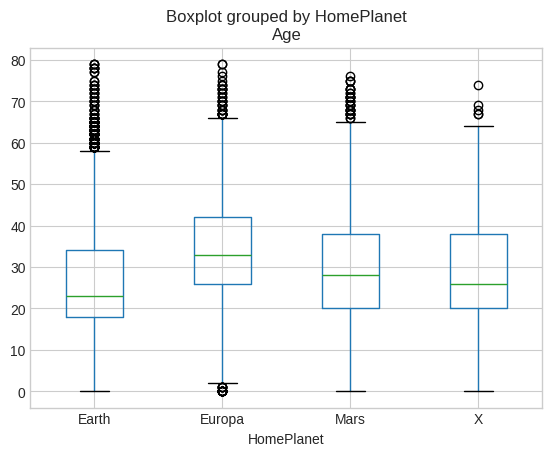

In [31]:
train_df.boxplot(column = "Age", by="HomePlanet")

In [32]:
train_df["CryoSleep"] = train_df["CryoSleep"].fillna(True)

In [33]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,299
Destination,274
Age,270
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [34]:
train_df["Destination"] = train_df["Destination"].fillna("TRAPPIST-1e")

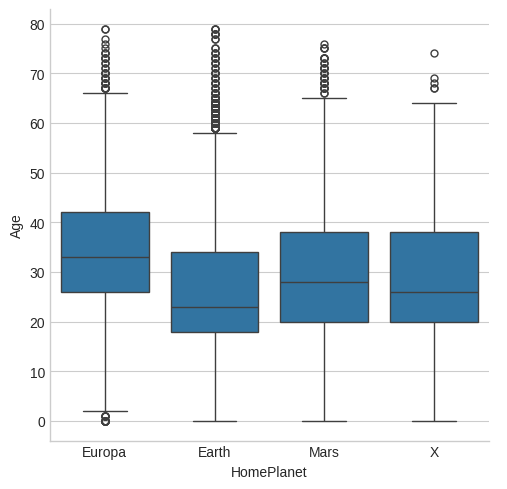

In [35]:
g = sns.catplot(x= "HomePlanet", y="Age", data = train_df,kind = "box")

In [36]:
train_df["Age"] = train_df["Age"].fillna(train_df[train_df["HomePlanet"] == "Europa"]["Age"].median())
train_df["Age"] = train_df["Age"].fillna(train_df[train_df["HomePlanet"] == "Earth"]["Age"].median())
train_df["Age"] = train_df["Age"].fillna(train_df[train_df["HomePlanet"] == "Mars"]["Age"].median())
train_df["Age"] = train_df["Age"].fillna(train_df[train_df["HomePlanet"] == "X"]["Age"].median())

In [37]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,299
Destination,0
Age,0
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


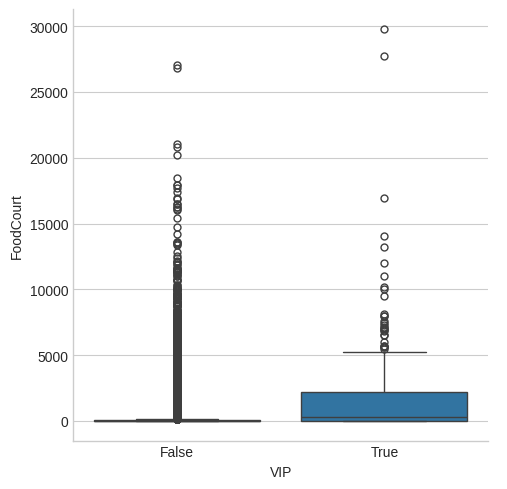

In [38]:
g = sns.catplot(x= "VIP", y="FoodCourt", data = train_df,kind = "box")

In [39]:
train_df[train_df["VIP"]==True]["FoodCourt"].median()

280.0

In [40]:
#train_df[train_df.VIP.isnull()]["VIP"] = [1 if i > 0  else 0 for i in train_df[train_df.VIP.isnull()]["FoodCourt"]]

In [41]:
train_df[train_df.VIP.isnull()]["VIP"] = train_df[train_df.VIP.isnull()]["VIP"].fillna(np.isposinf(train_df.FoodCourt))

In [42]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,299
Destination,0
Age,0
VIP,296
RoomService,263
FoodCourt,289
ShoppingMall,306


In [43]:
train_df["Cabin"] = train_df["Cabin"].fillna("X/0/Y")

In [44]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [45]:
train_df["RoomService"] = train_df["RoomService"].fillna(0.0)
train_df["FoodCourt"] = train_df["FoodCourt"].fillna(0.0)
train_df["ShoppingMall"] = train_df["ShoppingMall"].fillna(0.0)
train_df["Spa"] = train_df["Spa"].fillna(0.0)
train_df["VRDeck"] = train_df["VRDeck"].fillna(0.0)

In [46]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,296
RoomService,0
FoodCourt,0
ShoppingMall,0


In [47]:
train_df["VIP"] = train_df["VIP"].fillna(np.isposinf(train_df.FoodCourt))

In [48]:
'B/0/P'.replace("/"," ").strip().split(" ")[0]

'B'

In [49]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,X/0/Y,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,TRAPPIST-1e,33.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [50]:
train_df["Cabin1"]= ""
train_df["Cabin2"]= ""

Cabin1 = []
Cabin2 = []

for i in train_df.Cabin:
    Cabin1.append(i.replace("/"," ").strip().split(" ")[0])
    Cabin2.append(i.replace("/"," ").strip().split(" ")[2])


In [51]:
train_df.Cabin1 = Cabin1
train_df.Cabin2 = Cabin2

In [52]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,False,X/0/Y,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,X,Y
12967,9271_01,Mars,True,D/296/P,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,False,D/297/P,TRAPPIST-1e,33.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [53]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin1', 'Cabin2'],
      dtype='object')

In [54]:
train_df.drop(columns=['Name', 'Cabin'],inplace = True)

In [55]:
train_df = pd.get_dummies(train_df, columns = ["HomePlanet","Destination","Cabin1","Cabin2"])

In [56]:
train_df.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_X',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabin1_A', 'Cabin1_B', 'Cabin1_C',
       'Cabin1_D', 'Cabin1_E', 'Cabin1_F', 'Cabin1_G', 'Cabin1_T', 'Cabin1_X',
       'Cabin2_P', 'Cabin2_S', 'Cabin2_Y'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
train_df_len

8693

In [59]:
train_df.drop(columns=['PassengerId'],inplace = True)

In [60]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin1_X,Cabin2_P,Cabin2_S,Cabin2_Y
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,...,False,False,False,True,False,False,False,False,True,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,...,False,False,False,True,False,False,False,False,True,False


In [61]:
test = train_df[train_df_len:]
test.drop(labels = ["Transported"], axis = 1, inplace = True)

In [62]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin1_X,Cabin2_P,Cabin2_S,Cabin2_Y
8693,True,27.0,False,0.0,0.0,0.0,0.0,0.0,True,False,...,False,False,False,False,True,False,False,False,True,False
8694,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,True,False,...,False,False,False,True,False,False,False,False,True,False
8695,True,31.0,False,0.0,0.0,0.0,0.0,0.0,False,True,...,True,False,False,False,False,False,False,False,True,False
8696,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,True,...,True,False,False,False,False,False,False,False,True,False
8697,False,20.0,False,10.0,0.0,635.0,0.0,0.0,True,False,...,False,False,False,True,False,False,False,False,True,False


In [63]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Transported", axis = 1)
Y_train = train["Transported"].astype(int)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 42)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("Y_train", len(Y_train))
print("Y_test", len(Y_test))
print("test", len(test))

X_train 7389
X_test 1304
Y_train 7389
Y_test 1304
test 4277


In [65]:
Y_test.head()

,Transported
304,1
2697,0
8424,0
1672,1
8458,1


In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Cihazı kontrol et (GPU varsa kullan)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 📌 Veriyi NumPy'ye çevir ve float32 formatına getir
X_train_array = np.array(X_train, dtype=np.float32)
X_test_array = np.array(X_test, dtype=np.float32)

Y_train_array = np.array(Y_train, dtype=np.int64)
Y_test_array = np.array(Y_test, dtype=np.int64)

# 📌 ResNet CNN modeli 4D veri beklediği için, veriyi (batch, channels, height, width) formatına çevirelim
num_samples, num_features = X_train_array.shape

X_train_tensor = torch.tensor(X_train_array).view(num_samples, 1, 1, num_features)  # 4D format
X_test_tensor = torch.tensor(X_test_array).view(X_test_array.shape[0], 1, 1, num_features)

# Sınıf etiketlerini tensöre çevir
Y_train_tensor = torch.tensor(Y_train_array)
Y_test_tensor = torch.tensor(Y_test_array)

# DataLoader kullanarak batch processing yap
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 📌 Pretrained ResNet modelini yükle
resnet = models.resnet18(pretrained=True)  # ResNet-18 kullanıyoruz

# 📌 İlk Conv2D katmanını 1 kanala uyarlayalım (çünkü görüntü yerine tek kanal veriyoruz)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# 📌 Son katmanı (FC Layer) değiştir
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 2)  # Binary classification için 2 sınıf

# Modeli cihaza gönder (GPU varsa kullan)
resnet = resnet.to(device)

# Loss ve optimizer tanımla
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# 📌 Modeli eğitme fonksiyonu
def train_model(model, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for batch_X, batch_Y in train_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == batch_Y).sum().item()
            total += batch_Y.size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")

# 📌 Modeli eğit
train_model(resnet, train_loader, epochs=10)

# 📌 Test fonksiyonu
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_Y in test_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == batch_Y).sum().item()
            total += batch_Y.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

# 📌 Modeli test et
test_model(resnet, test_loader)


Using device: cuda
Epoch 1/10, Loss: 130.1670, Accuracy: 0.7453
Epoch 2/10, Loss: 118.7814, Accuracy: 0.7817
Epoch 3/10, Loss: 117.3969, Accuracy: 0.7844
Epoch 4/10, Loss: 116.3917, Accuracy: 0.7874
Epoch 5/10, Loss: 116.9758, Accuracy: 0.7875
Epoch 6/10, Loss: 115.7839, Accuracy: 0.7854
Epoch 7/10, Loss: 114.9134, Accuracy: 0.7864
Epoch 8/10, Loss: 115.0374, Accuracy: 0.7841
Epoch 9/10, Loss: 114.8168, Accuracy: 0.7868
Epoch 10/10, Loss: 114.4215, Accuracy: 0.7847
Test Accuracy: 0.7715


0.7714723926380368

In [67]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin1_X,Cabin2_P,Cabin2_S,Cabin2_Y
4753,False,20.0,False,542.0,175.0,0.0,5.0,0.0,True,False,...,False,False,False,True,False,False,False,False,True,False
4714,False,47.0,False,1904.0,18.0,0.0,89.0,4411.0,False,True,...,False,False,False,False,False,False,False,False,True,False
8102,False,38.0,True,0.0,1298.0,0.0,1841.0,1547.0,False,True,...,False,False,False,False,False,False,False,False,True,False
7716,False,19.0,False,5.0,666.0,0.0,123.0,440.0,True,False,...,False,False,False,True,False,False,False,False,True,False
6545,True,7.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,True,False,False,False,True,False,False


In [68]:
Y_train.head()

,Transported
4753,1
4714,0
8102,0
7716,0
6545,1


In [69]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 📌 Veriyi uygun formata getir
# Eğer veriler pandas DataFrame olarak geliyorsa, NumPy'ye çevirelim
X_train = X_train.astype(float)  # Eğer boolean/str varsa float'a çevir
X_test = X_test.astype(float)  # Aynı işlemi test verisine de uygula

Y_train = Y_train.astype(int)  # Binary sınıf için integer formatına getir
Y_test = Y_test.astype(int)

# 📌 Veriyi normalize et (Önemli!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 XGBoost DMatrix formatına çevir
dtrain = xgb.DMatrix(X_train_scaled, label=Y_train)
dtest = xgb.DMatrix(X_test_scaled, label=Y_test)

# 📌 Hiperparametre optimizasyonu (Önemli)
params = {
    'max_depth': 6,        # Ağacın maksimum derinliği
    'eta': 0.05,           # Öğrenme oranı (düşük olmalı)
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'nthread': 4,          # İşlemci çekirdeği sayısı
    'eval_metric': 'auc',  # AUC metriği (doğruluk ölçümü için iyi)
    'subsample': 0.8,      # Rastgele örnekleme (overfitting'i engeller)
    'colsample_bytree': 0.8,  # Özellik seçimi (overfitting'i engeller)
    'lambda': 1,           # L2 regularization (daha dengeli model için)
    'alpha': 0.1,          # L1 regularization
    'scale_pos_weight': 1,  # Eğer veri dengesizse ayarlanabilir
}

# 📌 Modeli eğit (Cross-validation ile en iyi iterasyon sayısını bul)
cv_results = xgb.cv(params, dtrain, num_boost_round=500, nfold=5, early_stopping_rounds=20, metrics="auc", seed=42)

# 📌 En iyi iterasyon sayısını belirle
best_num_round = cv_results.shape[0]

# 📌 Modeli eğit (En iyi iterasyon sayısı ile)
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_boost_round=best_num_round, evals=evallist)

# 📌 Test seti üzerinde tahmin yap
y_pred_proba = bst.predict(dtest)  # Olasılık tahmini
y_pred = (y_pred_proba >= 0.5).astype(int)  # 0.5 eşik değeri ile sınıflandırma

# 📌 Model değerlendirme
accuracy = accuracy_score(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred_proba)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ AUC Score: {auc:.4f}")


[0]	train-auc:0.86983	eval-auc:0.84717
[1]	train-auc:0.87638	eval-auc:0.85310
[2]	train-auc:0.88672	eval-auc:0.86273
[3]	train-auc:0.89042	eval-auc:0.86910
[4]	train-auc:0.89291	eval-auc:0.87040
[5]	train-auc:0.89285	eval-auc:0.87045
[6]	train-auc:0.89300	eval-auc:0.87133
[7]	train-auc:0.89503	eval-auc:0.86946
[8]	train-auc:0.89722	eval-auc:0.87155
[9]	train-auc:0.89722	eval-auc:0.87011
[10]	train-auc:0.89807	eval-auc:0.87282
[11]	train-auc:0.89939	eval-auc:0.87217
[12]	train-auc:0.90040	eval-auc:0.87186
[13]	train-auc:0.90139	eval-auc:0.87037
[14]	train-auc:0.90215	eval-auc:0.87087
[15]	train-auc:0.90260	eval-auc:0.87095
[16]	train-auc:0.90322	eval-auc:0.87114
[17]	train-auc:0.90345	eval-auc:0.87139
[18]	train-auc:0.90446	eval-auc:0.87205
[19]	train-auc:0.90503	eval-auc:0.87236
[20]	train-auc:0.90547	eval-auc:0.87241
[21]	train-auc:0.90619	eval-auc:0.87232
[22]	train-auc:0.90637	eval-auc:0.87289
[23]	train-auc:0.90696	eval-auc:0.87263
[24]	train-auc:0.90725	eval-auc:0.87254
[25]	train

Hiperparametre Optimizasyonu (Optuna ile)

In [70]:
!pip install optuna

In [71]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': -1
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False)
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict_proba(X_test_scaled)[:, 1]
    return roc_auc_score(Y_test, y_pred)

# Optuna ile en iyi hiperparametreleri bul
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# En iyi parametreleri göster
print("Best hyperparameters:", study.best_params)

# En iyi model ile yeniden eğit
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
best_model.fit(X_train_scaled, Y_train)
y_pred_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Sonuçları değerlendir
accuracy_best = accuracy_score(Y_test, (y_pred_best >= 0.5).astype(int))
auc_best = roc_auc_score(Y_test, y_pred_best)

print(f"🚀 Optimized Accuracy: {accuracy_best:.4f}")
print(f"🚀 Optimized AUC Score: {auc_best:.4f}")


[I 2025-01-22 14:43:40,730] A new study created in memory with name: no-name-4409fb80-a104-40cb-9c4f-18200e7f3f2b
[I 2025-01-22 14:43:41,417] Trial 0 finished with value: 0.8767440875696049 and parameters: {'max_depth': 6, 'learning_rate': 0.12960033531540066, 'n_estimators': 425, 'subsample': 0.9944114345898132, 'colsample_bytree': 0.6965072604473006, 'gamma': 0.00015106994831078007, 'lambda': 0.0038352712291403563, 'alpha': 0.07337968854524539}. Best is trial 0 with value: 0.8767440875696049.
[I 2025-01-22 14:43:43,133] Trial 1 finished with value: 0.8756148857035986 and parameters: {'max_depth': 10, 'learning_rate': 0.09611229142420123, 'n_estimators': 349, 'subsample': 0.8619546608933424, 'colsample_bytree': 0.9333233080771909, 'gamma': 5.856051423635575e-08, 'lambda': 5.322811813192358, 'alpha': 1.0030088923524578}. Best is trial 0 with value: 0.8767440875696049.
[I 2025-01-22 14:43:48,441] Trial 2 finished with value: 0.8811667948781284 and parameters: {'max_depth': 9, 'learning_

Best hyperparameters: {'max_depth': 5, 'learning_rate': 0.020854057225262256, 'n_estimators': 665, 'subsample': 0.8808012733141073, 'colsample_bytree': 0.9347296561425971, 'gamma': 6.445518728398151e-05, 'lambda': 0.09291514484010414, 'alpha': 0.0019314702496885051}
🚀 Optimized Accuracy: 0.7891
🚀 Optimized AUC Score: 0.8856


In [72]:
from sklearn.metrics import precision_recall_curve

# Farklı eşik değerlerini dene
y_pred_probs = best_model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_pred_probs)

# En iyi eşik değerini bul (F1-score için optimal threshold)
f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores)]

# Yeni eşik değeri ile sınıflandır
y_pred_adjusted = (y_pred_probs >= best_threshold).astype(int)
accuracy_adjusted = accuracy_score(Y_test, y_pred_adjusted)

print(f"🔍 Best Threshold: {best_threshold:.4f}")
print(f"🚀 Adjusted Accuracy: {accuracy_adjusted:.4f}")


🔍 Best Threshold: 0.3720
🚀 Adjusted Accuracy: 0.7853


In [73]:
# Yeni özellikler oluşturalım
X_train["Total_Spending"] = X_train["RoomService"] + X_train["FoodCourt"] + X_train["ShoppingMall"] + X_train["Spa"] + X_train["VRDeck"]
X_test["Total_Spending"] = X_test["RoomService"] + X_test["FoodCourt"] + X_test["ShoppingMall"] + X_test["Spa"] + X_test["VRDeck"]

# Log transformation (Bazı özellikleri log ölçeğine almak)
X_train["Log_Age"] = np.log1p(X_train["Age"])
X_test["Log_Age"] = np.log1p(X_test["Age"])

# Standartlaştırma (Tekrar scale işlemi yapalım)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 📌 Veriyi normalize et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Modelleri oluştur
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, use_label_encoder=False)
lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=6)
cat_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0)

# 📌 Modelleri eğit
xgb_model.fit(X_train_scaled, Y_train)
lgb_model.fit(X_train_scaled, Y_train)
cat_model.fit(X_train_scaled, Y_train)

# 📌 Her modelin tahmin olasılıklarını al
xgb_pred = xgb_model.predict_proba(X_test_scaled)[:, 1]
lgb_pred = lgb_model.predict_proba(X_test_scaled)[:, 1]
cat_pred = cat_model.predict_proba(X_test_scaled)[:, 1]

# 📌 Ağırlıklı ortalama hesapla (Modellerin başarı durumuna göre ağırlıklarını değiştirebiliriz)
final_pred_proba = (0.4 * xgb_pred) + (0.3 * lgb_pred) + (0.3 * cat_pred)  # XGBoost'a daha fazla ağırlık verdik
final_pred = (final_pred_proba >= 0.5).astype(int)  # 0.5 eşik değeriyle binary sınıflandırma

# 📌 Modeli değerlendirme
accuracy = accuracy_score(Y_test, final_pred)
auc = roc_auc_score(Y_test, final_pred_proba)

print(f"🚀 Weighted Averaging Accuracy: {accuracy:.4f}")
print(f"🚀 Weighted Averaging AUC Score: {auc:.4f}")


[LightGBM] [Info] Number of positive: 3731, number of negative: 3658
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1748
[LightGBM] [Info] Number of data points in the train set: 7389, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504940 -> initscore=0.019760
[LightGBM] [Info] Start training from score 0.019760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [81]:
import pandas as pd
import numpy as np

test_data = pd.read_csv("test.csv")

# 📌 Gereksiz sütunları çıkar (PassengerId, Name gibi model için kullanılmayan sütunlar)
test_data.drop(columns=["PassengerId", "Name", "Cabin"], errors='ignore', inplace=True)

# 📌 Kategorik değişkenleri one-hot encoding ile encode et
test_data = pd.get_dummies(test_data)

# 📌 Eğitim setindeki tüm sütunları kontrol et, eksik sütunları ekleyip sıralayalım
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Eksik sütunlara 0 ekliyoruz

# 📌 Sütunları aynı sıraya getir (Eğitim verisindeki ile aynı olmalı)
test_data = test_data[X_train.columns]

# 📌 Feature Engineering işlemleri (Total_Spending ve Log_Age ekleyelim)
test_data["Total_Spending"] = test_data["RoomService"] + test_data["FoodCourt"] + test_data["ShoppingMall"] + test_data["Spa"] + test_data["VRDeck"]
test_data["Log_Age"] = np.log1p(test_data["Age"])

# 📌 Test verisini normalize et
test_data_scaled = scaler.transform(test_data)

# 📌 Her modelin tahmin olasılıklarını al
xgb_pred_test = xgb_model.predict_proba(test_data_scaled)[:, 1]
lgb_pred_test = lgb_model.predict_proba(test_data_scaled)[:, 1]
cat_pred_test = cat_model.predict_proba(test_data_scaled)[:, 1]

# 📌 Ağırlıklı ortalama ile final tahminleri oluştur
final_pred_proba_test = (0.4 * xgb_pred_test) + (0.3 * lgb_pred_test) + (0.3 * cat_pred_test)
final_pred_test = (final_pred_proba_test >= 0.5).astype(int)  # 0.5 threshold ile sınıflandırma

# 📌 PassengerId ile tahminleri birleştir
submission = pd.DataFrame({
    "PassengerId": test_data.index,  # Eğer test verisinde PassengerId varsa kullan
    "Transported": final_pred_test
})

# 📌 CSV olarak kaydet
submission.to_csv("submission.csv", index=False)

print("🚀 Test dataset tahminleri tamamlandı ve 'submission.csv' olarak kaydedildi!")


🚀 Test dataset tahminleri tamamlandı ve 'submission.csv' olarak kaydedildi!


In [82]:
# 📌 PassengerId ile tahminleri birleştir
submission = pd.DataFrame({
    "PassengerId": test_data.index,  # Eğer test verisinde PassengerId varsa onu kullan
    "Transported": final_pred_test.astype(bool)  # 0 → False, 1 → True dönüşümü
})

# 📌 CSV olarak kaydet
submission.to_csv("submission.csv", index=False)

print("🚀 Test dataset tahminleri tamamlandı ve 'submission.csv' olarak kaydedildi!")


🚀 Test dataset tahminleri tamamlandı ve 'submission.csv' olarak kaydedildi!


In [83]:
results = pd.concat([test_passengerId, pd.DataFrame(final_pred_test.astype(bool),columns=["Transported"])],axis = 1)
results.to_csv("titanic_spaceship.csv", index=False)

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 📌 Veriyi Normalize Et (Scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Y_train'i kategorik formata çevir (Binary Classification için gerekmez ama güvenli)
Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


In [85]:
# 📌 MLP Modelini Oluştur
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),  # Modeli stabilize eder
    Dropout(0.3),  # Overfitting'i azaltır

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary Classification için sigmoid kullanılır
])

# 📌 Modeli Derle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [86]:
# 📌 Early Stopping (Overfitting’i önlemek için)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 📌 Modeli Eğit
history = model.fit(X_train_scaled, Y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.6317 - loss: 0.7179 - val_accuracy: 0.8018 - val_loss: 0.4601
Epoch 2/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7437 - loss: 0.5224 - val_accuracy: 0.7950 - val_loss: 0.4115
Epoch 3/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7550 - loss: 0.4858 - val_accuracy: 0.8058 - val_loss: 0.4018
Epoch 4/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.4761 - val_accuracy: 0.8065 - val_loss: 0.3985
Epoch 5/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7758 - loss: 0.4638 - val_accuracy: 0.8133 - val_loss: 0.3956
Epoch 6/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.4624 - val_accuracy: 0.8166 - val_loss: 0.3911
Epoch 7/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7781 - loss: 0.4537 - val_accuracy: 0.8146 - val_loss: 0.3916
Epoch 8/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7816 - loss: 0.4493 - val_accuracy: 

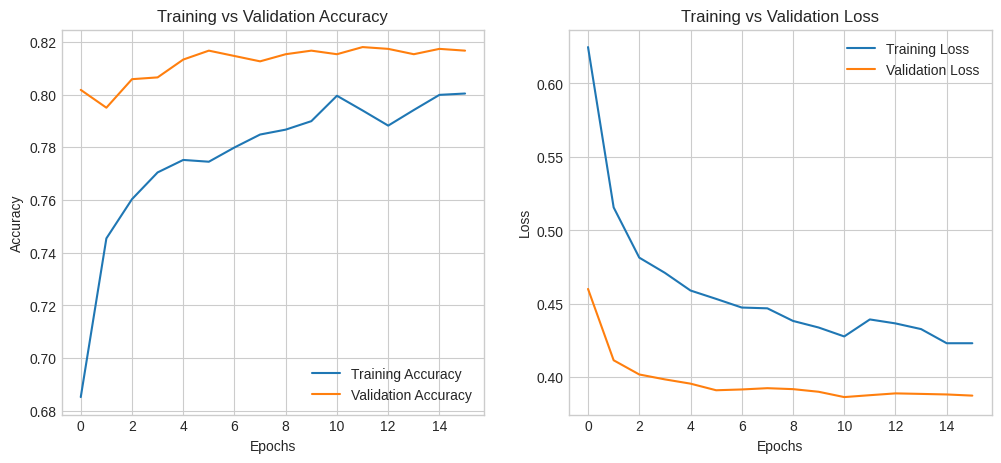

In [87]:
# 📌 Eğitim ve Validation Loss & Accuracy Grafiği
plt.figure(figsize=(12, 5))

# Accuracy Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


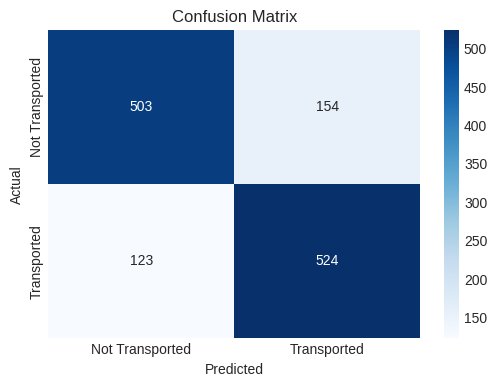

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       657
           1       0.77      0.81      0.79       647

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304

✅ Test Accuracy: 0.7876
✅ AUC Score: 0.8730


In [88]:
# 📌 Modeli Test Setinde Değerlendir
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

# 📌 Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Transported", "Transported"], yticklabels=["Not Transported", "Transported"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📌 Precision, Recall, F1-score Raporu
print("Classification Report:\n", classification_report(Y_test, y_pred))

# 📌 Accuracy & AUC Score
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)

print(f"✅ Test Accuracy: {accuracy:.4f}")
print(f"✅ AUC Score: {auc_score:.4f}")


In [89]:
# 📌 Test verisini normalleştir
test_data_scaled = scaler.transform(test_data)

# 📌 Model ile Tahmin Yap
test_pred_proba = model.predict(test_data_scaled)
test_pred = (test_pred_proba >= 0.5).astype(int)

# 📌 Submission Dosyası Oluştur
submission = pd.DataFrame({
    "PassengerId": test_data.index,  # Eğer test setinde PassengerId varsa kullan
    "Transported": test_pred.flatten().astype(bool)  # 0 → False, 1 → True dönüşümü
})

# 📌 CSV Kaydet
submission.to_csv("mlp_submission.csv", index=False)

print("🚀 MLP Model ile test tahminleri tamamlandı ve 'mlp_submission.csv' olarak kaydedildi!")


134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
🚀 MLP Model ile test tahminleri tamamlandı ve 'mlp_submission.csv' olarak kaydedildi!


In [90]:
results = pd.concat([test_passengerId, pd.DataFrame(test_pred.flatten().astype(bool),columns=["Transported"])],axis = 1)
results.to_csv("mlp_submission_titanic_spaceship.csv", index=False)